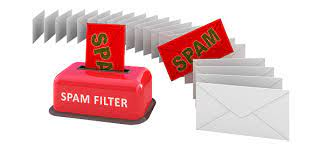

# EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\ayith\\OneDrive\\Documents\\data sets\\spam.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [8]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [9]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [10]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
pd.crosstab(df['v2'],df['v1']).sum()

v1
ham     4825
spam     747
dtype: int64

In [13]:
#dropping null values
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [14]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df1.rename(columns={'v1':'ham or spam','v2':'mail message'},inplace=True)

In [16]:
df1.head()

,ham or spam,mail message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df1.duplicated().sum()

403

In [18]:
df=df1.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

In [20]:
df['ham or spam'].value_counts()

ham     4516
spam     653
Name: ham or spam, dtype: int64

In [21]:
y=df['ham or spam']
X=df['mail message']

In [22]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [23]:
# Convert the text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
#Fitting multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [26]:
#Testing  the mail (spam/ham)

mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred

array(['ham'], dtype='<U4')

In [27]:
#finding accuracy of the training dataset
model.score(X_train_count,y_train)

0.9936428966279712

In [28]:
#finding accuracy of the test dataset
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9832366215344939